In [1]:
from src.data_preprocessing.load_data import load_data
from src.data_preprocessing.data_augmentation import augment_data
from src.data_preprocessing.basic_preprocessing import preprocess_data
from src.data_preprocessing.displayer import display_images
from src.modeling.modeling import create_resnet50_model, create_mobilenetv2_model, create_vgg16_model, create_head_classifier
from src.training.training import plot_training_history, train_model
from src.training.optimize_dataset import optimize_dataset
from src.training.save_model import save_model_and_history
from src.evaluation.evaluation import evaluate_model
from src.utils.model_utils import predict, prune_model

In [2]:
SAVE_BASE_DIR = './saved'

IMAGE_COLUMN = 224
IMAGE_ROW = 224
IMAGE_SIZE = (IMAGE_COLUMN, IMAGE_ROW)
INPUT_SIZE = (IMAGE_COLUMN, IMAGE_ROW, 3)
NUM_CLASSES = 4

TRAINING_DIR = './data/raw/Training/'
TESTING_DIR = './data/raw/Testing/'
BATCH_SIZE = 32
EPOCHS = 10

#### DATASET LOADING, BASIC PREPROCESSING, TRAINSET AUGMENTATION

Found 5712 files belonging to 4 classes.
Using 4570 files for training.
Found 5712 files belonging to 4 classes.
Using 1142 files for validation.
Found 1311 files belonging to 4 classes.
['glioma', 'meningioma', 'notumor', 'pituitary']
['glioma', 'meningioma', 'notumor', 'pituitary']
['glioma', 'meningioma', 'notumor', 'pituitary']


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..249.16835].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..225.53577].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..249.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..237.21411].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


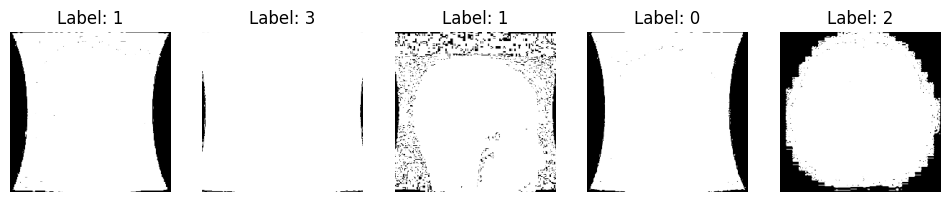

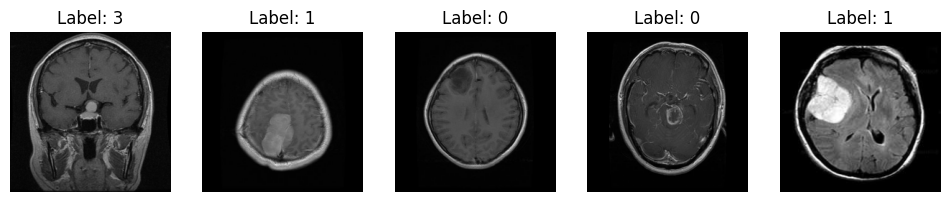

In [3]:
trainset, validset, testset = load_data(
    TRAINING_DIR,
    TESTING_DIR,
    batch_size=BATCH_SIZE,
    img_size=IMAGE_SIZE,
    color_mode='rgb'
)

print(trainset.class_names)
print(validset.class_names)
print(testset.class_names)
class_names = testset.class_names

display_images(trainset, num_images=5, color_mode='jet', normalize=False)
display_images(trainset, num_images=5, color_mode='jet', normalize=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [49.895947..254.86632].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [11.07883..248.64848].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [45.09395..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..229.81621].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..200.68921].


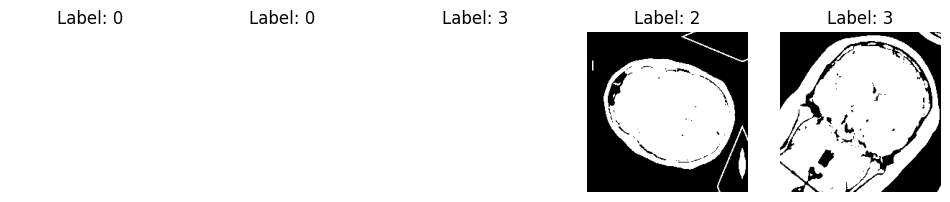

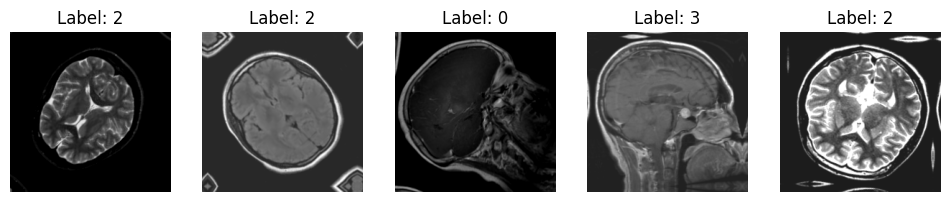

In [4]:
augmented_trainset = augment_data(trainset)

display_images(augmented_trainset, num_images=5, color_mode='jet', normalize=False)
display_images(augmented_trainset, num_images=5, color_mode='jet', normalize=True)

#### VGG16 Feature Extractor Method

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-122.967705..129.3165].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-96.39944..151.061].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-79.13344..151.061].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123.68..68.45249].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-92.489746..151.061].


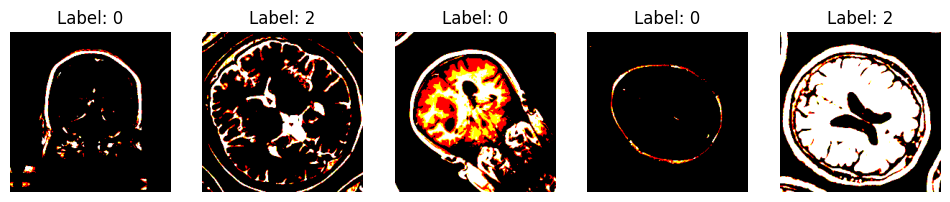

In [5]:
preprocessed_trainset = preprocess_data(augmented_trainset, img_size=IMAGE_SIZE, model_type='vgg16')
preprocessed_validset = preprocess_data(validset, img_size=IMAGE_SIZE, model_type='vgg16')
preprocessed_testset = preprocess_data(testset, img_size=IMAGE_SIZE, model_type='vgg16')

display_images(preprocessed_trainset, num_images=5, color_mode='jet')

optimized_trainset = optimize_dataset(preprocessed_trainset, batch_size=BATCH_SIZE, prefetch=True, shuffle=True)
optimized_validset = optimize_dataset(preprocessed_validset, batch_size=BATCH_SIZE, prefetch=True)
optimized_testset = optimize_dataset(preprocessed_testset, batch_size=BATCH_SIZE, prefetch=True)

Epoch 1/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 469s 3s/step - accuracy: 0.6431 - loss: 0.9542 - val_accuracy: 0.7172 - val_loss: 0.8548 - learning_rate: 0.0010
Epoch 2/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 603s 4s/step - accuracy: 0.7309 - loss: 0.7385 - val_accuracy: 0.7609 - val_loss: 0.7140 - learning_rate: 0.0010
Epoch 3/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 434s 2s/step - accuracy: 0.7543 - loss: 0.6622 - val_accuracy: 0.8170 - val_loss: 0.5184 - learning_rate: 0.0010
Epoch 4/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 503s 3s/step - accuracy: 0.7711 - loss: 0.6246 - val_accuracy: 0.7863 - val_loss: 0.5868 - learning_rate: 0.0010
Epoch 5/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7704 - loss: 0.5880
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
143/143 ━━━━━━━━━━━━━━━━━━━━ 490s 3s/step - accuracy: 0.7674 - loss: 0.6110 - val_accuracy: 0.7820 - val_loss: 0.5869 - learning_rate: 0.0010
Epoch 6/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 378s 2s/step - accuracy: 0.7720 - loss: 0.59

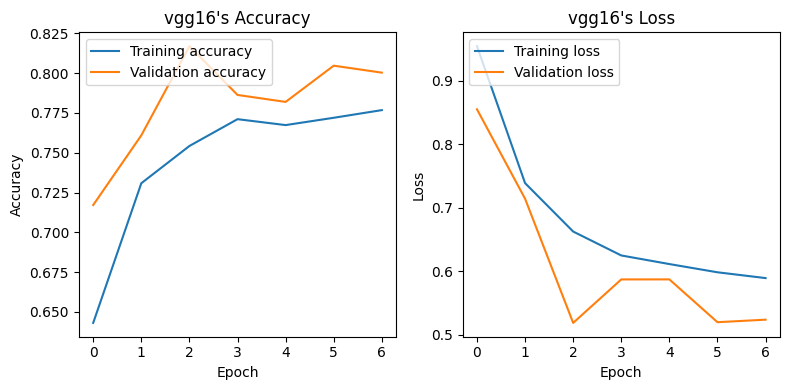

41/41 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.7834 - loss: 0.5783
Test loss: 0.5783
Test accuracy: 0.7834
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━

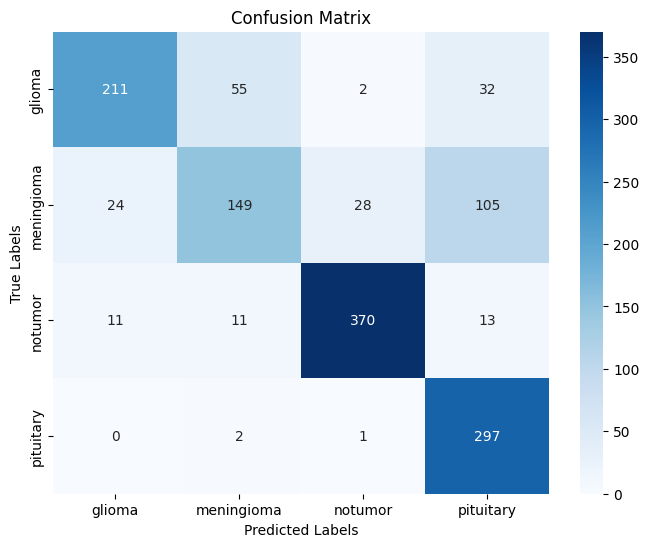

Model saved to ./saved/vgg16/feature_extractor/model.keras
Training history saved to ./saved/vgg16/feature_extractor/history.json


: 

: 

In [ ]:
vgg16_model = create_vgg16_model(input_shape=INPUT_SIZE,
                                 num_classes=NUM_CLASSES, 
                                 head_classifier=create_head_classifier,
                                 fine_tune=False)

vgg16_history, vgg16_model = train_model(vgg16_model,
                                         optimized_trainset,
                                         optimized_validset,
                                         batch_size=BATCH_SIZE,
                                         epochs=EPOCHS)

plot_training_history(vgg16_history, 
                      model_name='vgg16',
                      save_path=f'{SAVE_BASE_DIR}/vgg16/feature_extractor/plot.png')

evaluate_model(vgg16_model, 
               optimized_testset, 
               class_names=class_names, 
               save_path="saved/vgg16/feature_extractor/confusion_matrix.png")

save_model_and_history(vgg16_model, vgg16_history,
                       model_filename=f"{SAVE_BASE_DIR}/vgg16/feature_extractor/model.keras",
                       history_filename=f"{SAVE_BASE_DIR}/vgg16/feature_extractor/history.json")

#### VGG16 Fine-Tuning Method

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123.68..104.56591].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-109.06507..148.30624].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-108.15622..124.645744].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123.68..111.09193].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123.68..137.2398].


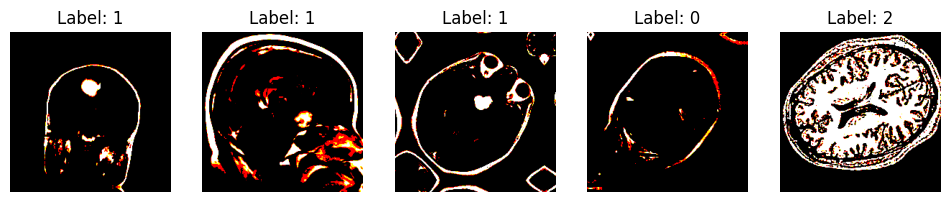

In [7]:
preprocessed_trainset = preprocess_data(augmented_trainset, img_size=IMAGE_SIZE, model_type='vgg16')
preprocessed_validset = preprocess_data(validset, img_size=IMAGE_SIZE, model_type='vgg16')
preprocessed_testset = preprocess_data(testset, img_size=IMAGE_SIZE, model_type='vgg16')

display_images(preprocessed_trainset, num_images=5, color_mode='jet')

optimized_trainset = optimize_dataset(preprocessed_trainset, batch_size=BATCH_SIZE, prefetch=True, shuffle=True)
optimized_validset = optimize_dataset(preprocessed_validset, batch_size=BATCH_SIZE, prefetch=True)
optimized_testset = optimize_dataset(preprocessed_testset, batch_size=BATCH_SIZE, prefetch=True)

Epoch 1/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 401s 3s/step - accuracy: 0.4626 - loss: 1.3901 - val_accuracy: 0.6655 - val_loss: 0.7381 - learning_rate: 0.0010
Epoch 2/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 398s 3s/step - accuracy: 0.7700 - loss: 0.5962 - val_accuracy: 0.8135 - val_loss: 0.4840 - learning_rate: 0.0010
Epoch 3/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 408s 3s/step - accuracy: 0.8558 - loss: 0.4234 - val_accuracy: 0.8687 - val_loss: 0.4594 - learning_rate: 0.0010
Epoch 4/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 407s 3s/step - accuracy: 0.8980 - loss: 0.2971 - val_accuracy: 0.8660 - val_loss: 0.4804 - learning_rate: 0.0010
Epoch 5/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 420s 3s/step - accuracy: 0.9125 - loss: 0.2650 - val_accuracy: 0.9282 - val_loss: 0.2499 - learning_rate: 0.0010
Epoch 6/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 415s 3s/step - accuracy: 0.9350 - loss: 0.1865 - val_accuracy: 0.8625 - val_loss: 0.5926 - learning_rate: 0.0010
Epoch 7/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9283 - loss: 0.20

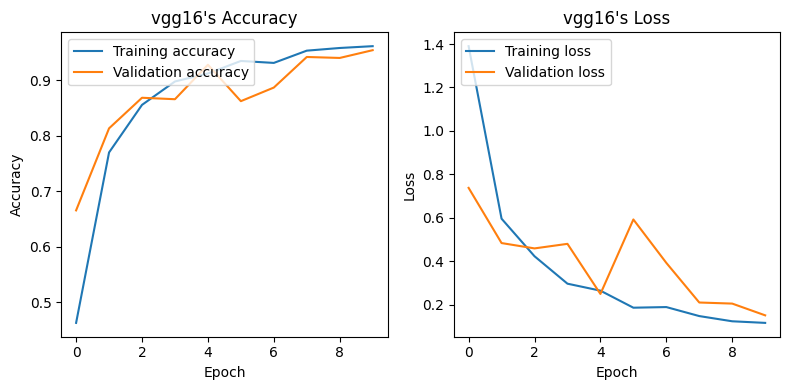

41/41 ━━━━━━━━━━━━━━━━━━━━ 245s 6s/step - accuracy: 0.9580 - loss: 0.1467
Test loss: 0.1467
Test accuracy: 0.9580
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━

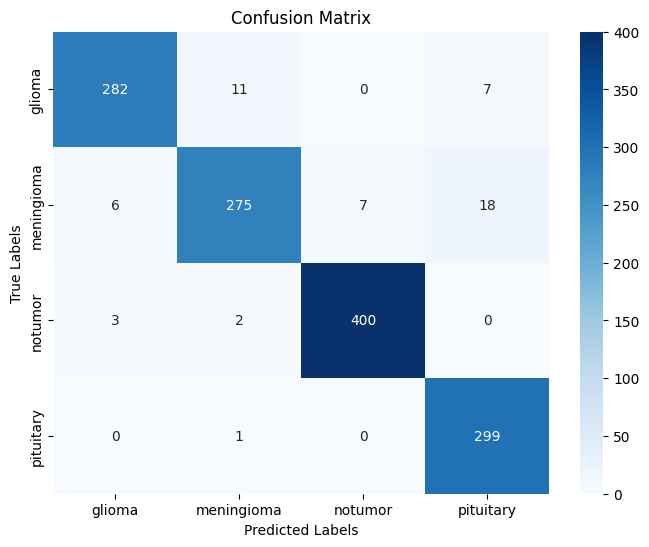

Model saved to ./saved/vgg16/fine_tuning/model.keras
Training history saved to ./saved/vgg16/fine_tuning/history.json


In [8]:
vgg16_model = create_vgg16_model(input_shape=INPUT_SIZE,
                                 num_classes=NUM_CLASSES, 
                                 head_classifier=create_head_classifier,
                                 fine_tune=True)

vgg16_history, vgg16_model = train_model(vgg16_model,
                                         optimized_trainset,
                                         optimized_validset,
                                         batch_size=BATCH_SIZE,
                                         epochs=EPOCHS)

plot_training_history(vgg16_history, 
                      model_name='vgg16',
                      save_path=f'{SAVE_BASE_DIR}/vgg16/fine_tuning/plot.png')

evaluate_model(vgg16_model, 
               optimized_testset, 
               class_names=class_names, 
               save_path="saved/vgg16/fine_tuning/confusion_matrix.png")

save_model_and_history(vgg16_model, vgg16_history,
                       model_filename=f"{SAVE_BASE_DIR}/vgg16/fine_tuning/model.keras",
                       history_filename=f"{SAVE_BASE_DIR}/vgg16/fine_tuning/history.json")

#### ResNet50V2 Feature Extractor Method

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123.68..122.76725].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-76.77194..151.061].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-80.99577..151.061].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-103.66469..138.7374].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-91.6824..151.061].


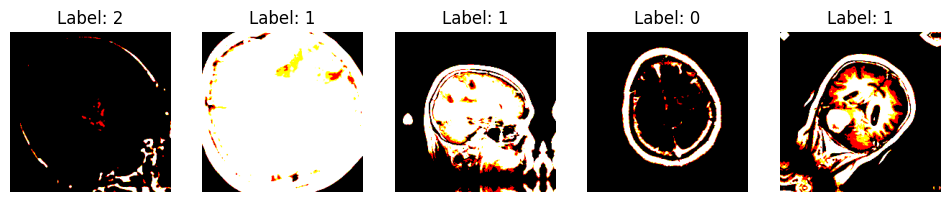

In [9]:
preprocessed_trainset = preprocess_data(augmented_trainset, img_size=IMAGE_SIZE, model_type='resnet50v2')
preprocessed_validset = preprocess_data(validset, img_size=IMAGE_SIZE, model_type='resnet50v2')
preprocessed_testset = preprocess_data(testset, img_size=IMAGE_SIZE, model_type='resnet50v2')

display_images(preprocessed_trainset, num_images=5, color_mode='jet')

optimized_trainset = optimize_dataset(preprocessed_trainset, batch_size=BATCH_SIZE, prefetch=True, shuffle=True)
optimized_validset = optimize_dataset(preprocessed_validset, batch_size=BATCH_SIZE, prefetch=True)
optimized_testset = optimize_dataset(preprocessed_testset, batch_size=BATCH_SIZE, prefetch=True)

Epoch 1/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 468s 3s/step - accuracy: 0.7387 - loss: 0.7555 - val_accuracy: 0.8109 - val_loss: 0.5040 - learning_rate: 0.0010
Epoch 2/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 497s 3s/step - accuracy: 0.8090 - loss: 0.5247 - val_accuracy: 0.8459 - val_loss: 0.3855 - learning_rate: 0.0010
Epoch 3/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 218s 900ms/step - accuracy: 0.8212 - loss: 0.4885 - val_accuracy: 0.8634 - val_loss: 0.3666 - learning_rate: 0.0010
Epoch 4/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 159s 895ms/step - accuracy: 0.8284 - loss: 0.4473 - val_accuracy: 0.8713 - val_loss: 0.3553 - learning_rate: 0.0010
Epoch 5/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 173s 989ms/step - accuracy: 0.8383 - loss: 0.4378 - val_accuracy: 0.8634 - val_loss: 0.3644 - learning_rate: 0.0010
Epoch 6/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 715ms/step - accuracy: 0.8568 - loss: 0.4092
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
143/143 ━━━━━━━━━━━━━━━━━━━━ 158s 892ms/step - accuracy: 0.84

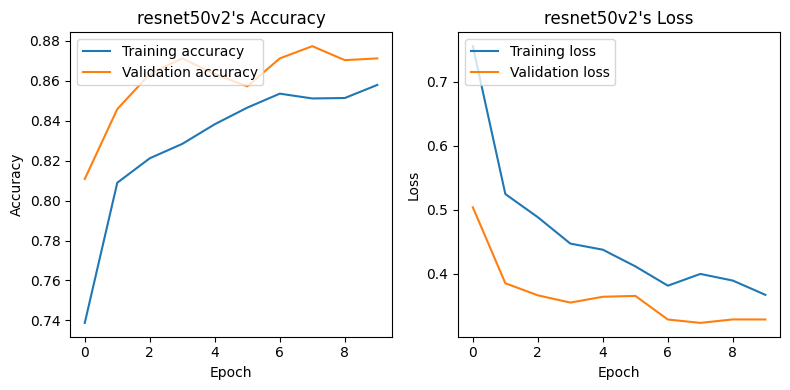

41/41 ━━━━━━━━━━━━━━━━━━━━ 36s 885ms/step - accuracy: 0.8627 - loss: 0.3678
Test loss: 0.3678
Test accuracy: 0.8627
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 931ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 923ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 895ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 898ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 919ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 970ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 939ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 912ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 911ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 923ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 974ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 951ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 916ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 937ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 962ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 947ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 909ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 941ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 901ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 982ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 918ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 9

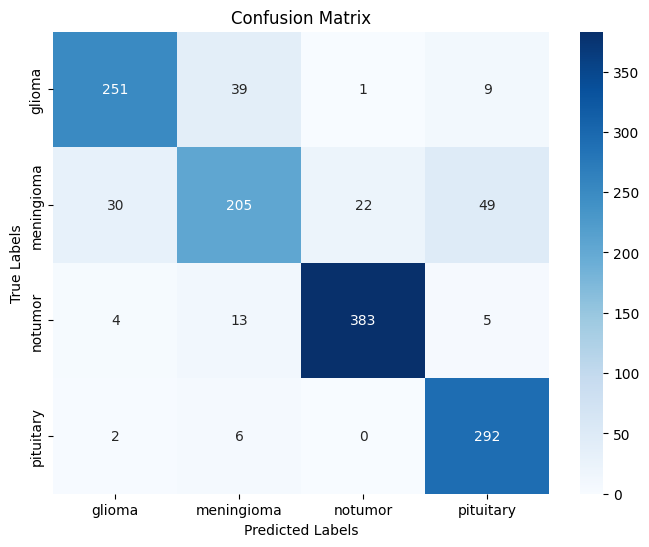

Model saved to ./saved/resnet50v2/feature_extractor/model.keras
Training history saved to ./saved/resnet50v2/feature_extractor/history.json


In [10]:
resnet50_model = create_resnet50_model(input_shape=INPUT_SIZE, 
                                       num_classes=NUM_CLASSES,
                                       head_classifier=create_head_classifier,
                                       fine_tune=False)

resnet50_history, resnet50_model = train_model(resnet50_model,
                                               optimized_trainset,
                                               optimized_validset,
                                               batch_size=BATCH_SIZE,
                                               epochs=EPOCHS)

plot_training_history(resnet50_history,
                      model_name='resnet50v2',
                      save_path=f'{SAVE_BASE_DIR}/resnet50v2/feature_extractor/plot.png')

evaluate_model(resnet50_model, 
               optimized_testset, 
               class_names=class_names, 
               save_path='saved/resnet50v2/feature_extractor/confusion_matrix.png')

save_model_and_history(resnet50_model, resnet50_history, 
                       model_filename=f"{SAVE_BASE_DIR}/resnet50v2/feature_extractor/model.keras", 
                       history_filename=f"{SAVE_BASE_DIR}/resnet50v2/feature_extractor/history.json")

#### ResNet50V2 Fine-Tuning Method

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-107.64787..124.64533].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123.68..108.368385].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123.68..93.65801].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123.68..136.06061].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123.68..119.60705].


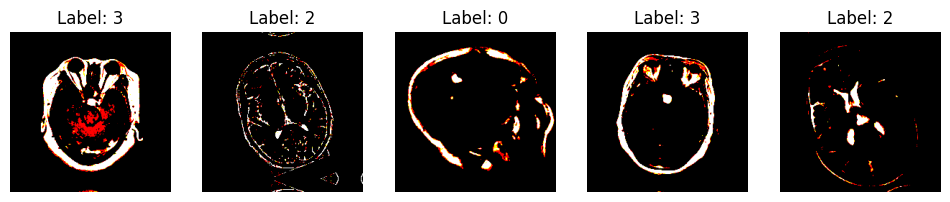

In [11]:
preprocessed_trainset = preprocess_data(augmented_trainset, img_size=IMAGE_SIZE, model_type='resnet50v2')
preprocessed_validset = preprocess_data(validset, img_size=IMAGE_SIZE, model_type='resnet50v2')
preprocessed_testset = preprocess_data(testset, img_size=IMAGE_SIZE, model_type='resnet50v2')

display_images(preprocessed_trainset, num_images=5, color_mode='jet')

optimized_trainset = optimize_dataset(preprocessed_trainset, batch_size=BATCH_SIZE, prefetch=True, shuffle=True)
optimized_validset = optimize_dataset(preprocessed_validset, batch_size=BATCH_SIZE, prefetch=True)
optimized_testset = optimize_dataset(preprocessed_testset, batch_size=BATCH_SIZE, prefetch=True)

Epoch 1/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 212s 1s/step - accuracy: 0.7786 - loss: 0.6605 - val_accuracy: 0.8792 - val_loss: 0.3988 - learning_rate: 0.0010
Epoch 2/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 201s 1s/step - accuracy: 0.8536 - loss: 0.4146 - val_accuracy: 0.8993 - val_loss: 0.3496 - learning_rate: 0.0010
Epoch 3/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 202s 1s/step - accuracy: 0.8665 - loss: 0.3556 - val_accuracy: 0.8608 - val_loss: 0.4287 - learning_rate: 0.0010
Epoch 4/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 207s 1s/step - accuracy: 0.8759 - loss: 0.3360 - val_accuracy: 0.9168 - val_loss: 0.2591 - learning_rate: 0.0010
Epoch 5/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 182s 1s/step - accuracy: 0.8873 - loss: 0.3067 - val_accuracy: 0.8564 - val_loss: 0.3654 - learning_rate: 0.0010
Epoch 6/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 755ms/step - accuracy: 0.8884 - loss: 0.2877
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
143/143 ━━━━━━━━━━━━━━━━━━━━ 164s 932ms/step - accuracy: 0.8869 - loss

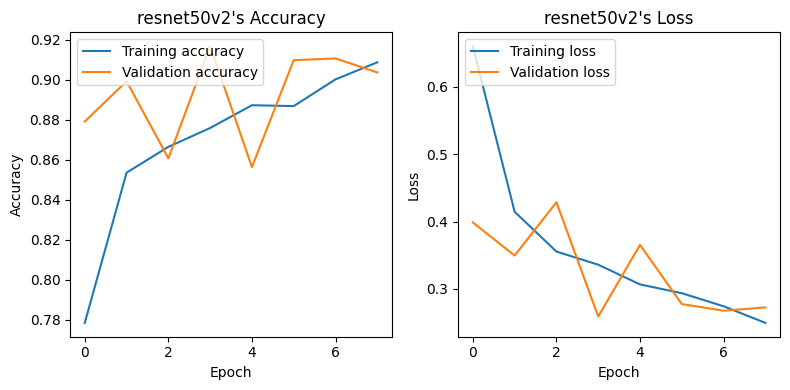

41/41 ━━━━━━━━━━━━━━━━━━━━ 38s 925ms/step - accuracy: 0.8810 - loss: 0.3242
Test loss: 0.3242
Test accuracy: 0.8810
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 957ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 948ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 916ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 910ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 947ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 938ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 917ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 962ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 984ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 922ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 947ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 961ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 927ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 994ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 965ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 911ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 969ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 987ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 9

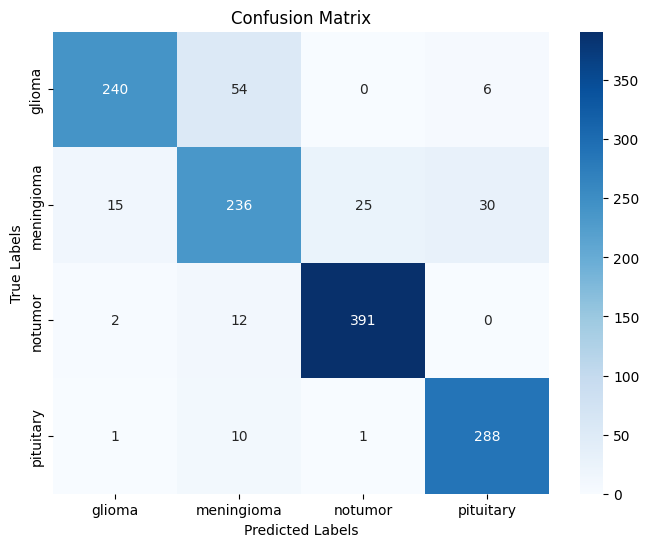

Model saved to ./saved/resnet50v2/fine_tuning/model.keras
Training history saved to ./saved/resnet50v2/fine_tuning/history.json


In [12]:
resnet50_model = create_resnet50_model(input_shape=INPUT_SIZE, 
                                       num_classes=NUM_CLASSES,
                                       head_classifier=create_head_classifier,
                                       fine_tune=True)

resnet50_history, resnet50_model = train_model(resnet50_model,
                                               optimized_trainset,
                                               optimized_validset,
                                               batch_size=BATCH_SIZE,
                                               epochs=EPOCHS)

plot_training_history(resnet50_history,
                      model_name='resnet50v2',
                      save_path=f'{SAVE_BASE_DIR}/resnet50v2/fine_tuning/plot.png')

evaluate_model(resnet50_model, 
               optimized_testset, 
               class_names=class_names, 
               save_path='saved/resnet50v2/fine_tuning/confusion_matrix.png')

save_model_and_history(resnet50_model, resnet50_history, 
                       model_filename=f"{SAVE_BASE_DIR}/resnet50v2/fine_tuning/model.keras", 
                       history_filename=f"{SAVE_BASE_DIR}/resnet50v2/fine_tuning/history.json")

#### MobileNetV2 Feature Extractor Method

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.78532743].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.7511816].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.72176206..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.7826067..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.6849271..1.0].


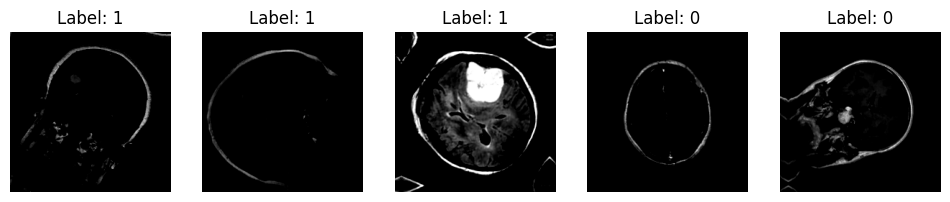

In [13]:
preprocessed_trainset = preprocess_data(augmented_trainset, img_size=IMAGE_SIZE, model_type='mobilenetv2')
preprocessed_validset = preprocess_data(validset, img_size=IMAGE_SIZE, model_type='mobilenetv2')
preprocessed_testset = preprocess_data(testset, img_size=IMAGE_SIZE, model_type='mobilenetv2')

display_images(preprocessed_trainset, num_images=5, color_mode='jet')

optimized_trainset = optimize_dataset(preprocessed_trainset, batch_size=BATCH_SIZE, prefetch=True, shuffle=True)
optimized_validset = optimize_dataset(preprocessed_validset, batch_size=BATCH_SIZE, prefetch=True)
optimized_testset = optimize_dataset(preprocessed_testset, batch_size=BATCH_SIZE, prefetch=True)

Epoch 1/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 101s 450ms/step - accuracy: 0.7411 - loss: 0.7403 - val_accuracy: 0.8354 - val_loss: 0.4229 - learning_rate: 0.0010
Epoch 2/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 97s 451ms/step - accuracy: 0.8055 - loss: 0.5324 - val_accuracy: 0.8257 - val_loss: 0.4514 - learning_rate: 0.0010
Epoch 3/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step - accuracy: 0.8122 - loss: 0.5119
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
143/143 ━━━━━━━━━━━━━━━━━━━━ 93s 424ms/step - accuracy: 0.8177 - loss: 0.4934 - val_accuracy: 0.8257 - val_loss: 0.4397 - learning_rate: 0.0010
Epoch 4/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 90s 414ms/step - accuracy: 0.8254 - loss: 0.4612 - val_accuracy: 0.8476 - val_loss: 0.3907 - learning_rate: 1.0000e-04
Epoch 5/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 91s 422ms/step - accuracy: 0.8319 - loss: 0.4499 - val_accuracy: 0.8529 - val_loss: 0.3804 - learning_rate: 1.0000e-04
Epoch 6/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 126s 392ms/step - accu

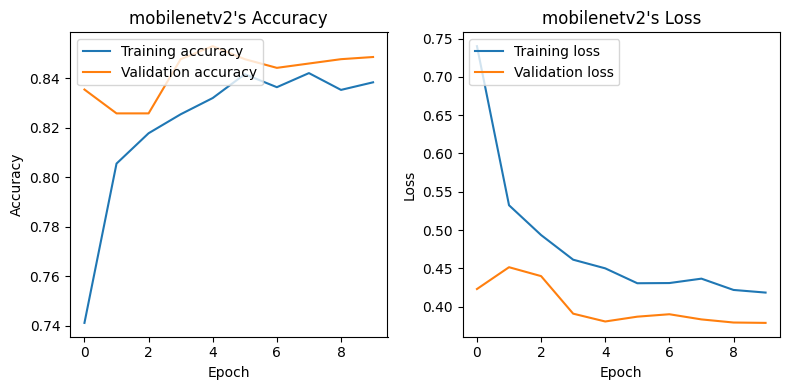

41/41 ━━━━━━━━━━━━━━━━━━━━ 14s 334ms/step - accuracy: 0.8268 - loss: 0.4633
Test loss: 0.4633
Test accuracy: 0.8268
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 4

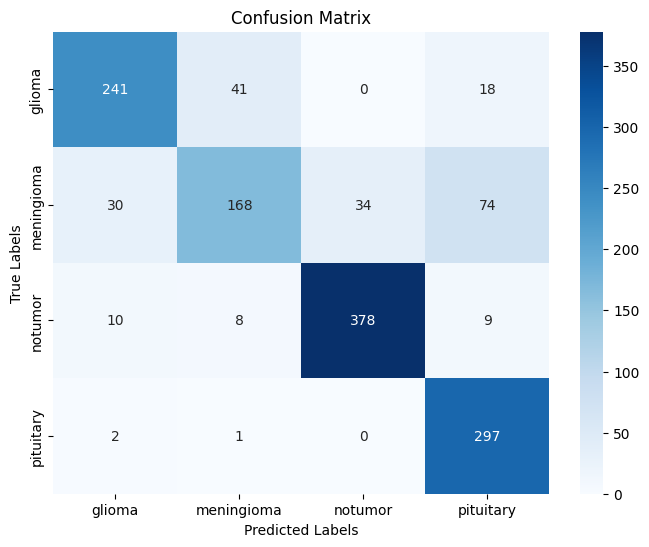

Model saved to ./saved/mobilenetv2/feature_extractor/model.keras
Training history saved to ./saved/mobilenetv2/feature_extractor/history.json


In [14]:
mobilenetv2_model = create_mobilenetv2_model(input_shape=INPUT_SIZE, 
                                             num_classes=NUM_CLASSES,
                                             head_classifier=create_head_classifier,
                                             fine_tune=False)

mobilenetv2_history, mobilenetv2_model = train_model(mobilenetv2_model, 
                                                     optimized_trainset, 
                                                     optimized_validset, 
                                                     batch_size=BATCH_SIZE, 
                                                     epochs=EPOCHS)

plot_training_history(mobilenetv2_history,
                      model_name='mobilenetv2',
                      save_path=f'{SAVE_BASE_DIR}/mobilenetv2/feature_extractor/plot.png')

evaluate_model(mobilenetv2_model, 
               optimized_testset, 
               class_names=class_names, 
               save_path='saved/mobilenetv2/feature_extractor/confusion_matrix.png')

save_model_and_history(mobilenetv2_model,
                       mobilenetv2_history, 
                       model_filename=f"{SAVE_BASE_DIR}/mobilenetv2/feature_extractor/model.keras", 
                       history_filename=f"{SAVE_BASE_DIR}/mobilenetv2/feature_extractor/history.json")

#### MobileNetV2 Fine-Tuning Method

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.9553747..0.8071579].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.7510015].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.62783253].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.834605..0.93253255].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.49931467].


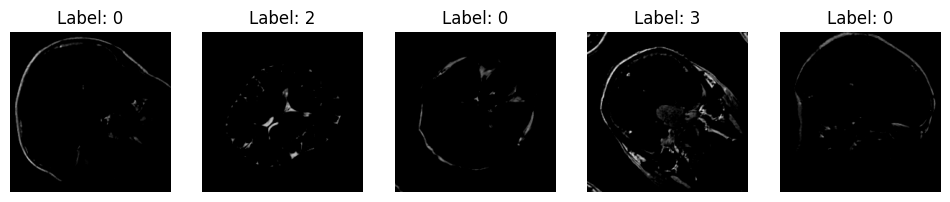

In [15]:
preprocessed_trainset = preprocess_data(augmented_trainset, img_size=IMAGE_SIZE, model_type='mobilenetv2')
preprocessed_validset = preprocess_data(validset, img_size=IMAGE_SIZE, model_type='mobilenetv2')
preprocessed_testset = preprocess_data(testset, img_size=IMAGE_SIZE, model_type='mobilenetv2')

display_images(preprocessed_trainset, num_images=5, color_mode='jet')

optimized_trainset = optimize_dataset(preprocessed_trainset, batch_size=BATCH_SIZE, prefetch=True, shuffle=True)
optimized_validset = optimize_dataset(preprocessed_validset, batch_size=BATCH_SIZE, prefetch=True)
optimized_testset = optimize_dataset(preprocessed_testset, batch_size=BATCH_SIZE, prefetch=True)

Epoch 1/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 148s 429ms/step - accuracy: 0.7930 - loss: 0.5891 - val_accuracy: 0.7942 - val_loss: 0.6840 - learning_rate: 0.0010
Epoch 2/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 141s 460ms/step - accuracy: 0.8597 - loss: 0.3914 - val_accuracy: 0.8004 - val_loss: 0.5990 - learning_rate: 0.0010
Epoch 3/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 132s 403ms/step - accuracy: 0.8794 - loss: 0.3326 - val_accuracy: 0.8783 - val_loss: 0.3727 - learning_rate: 0.0010
Epoch 4/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 138s 442ms/step - accuracy: 0.8902 - loss: 0.3024 - val_accuracy: 0.8809 - val_loss: 0.3725 - learning_rate: 0.0010
Epoch 5/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 137s 427ms/step - accuracy: 0.8921 - loss: 0.2923 - val_accuracy: 0.8800 - val_loss: 0.3345 - learning_rate: 0.0010
Epoch 6/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 133s 414ms/step - accuracy: 0.9088 - loss: 0.2566 - val_accuracy: 0.8862 - val_loss: 0.3335 - learning_rate: 0.0010
Epoch 7/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 134s 405ms/step - accura

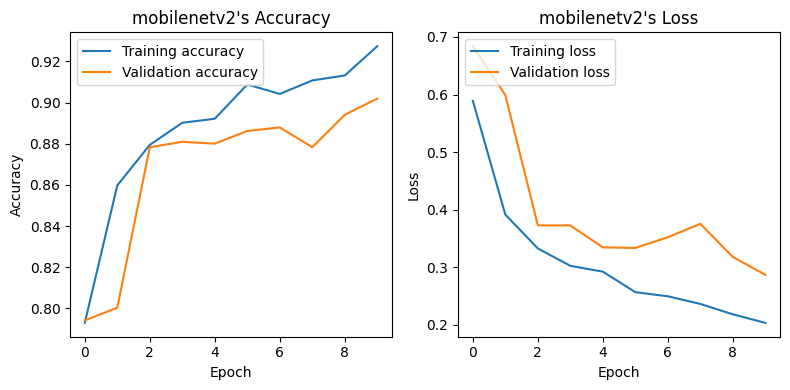

41/41 ━━━━━━━━━━━━━━━━━━━━ 16s 384ms/step - accuracy: 0.8879 - loss: 0.3266
Test loss: 0.3266
Test accuracy: 0.8879
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 4

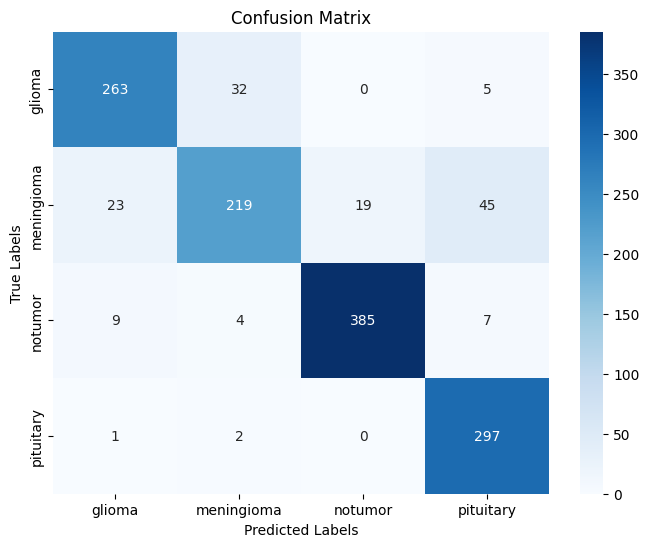

Model saved to ./saved/mobilenetv2/fine_tuning/model.keras
Training history saved to ./saved/mobilenetv2/fine_tuning/history.json


In [16]:
mobilenetv2_model = create_mobilenetv2_model(input_shape=INPUT_SIZE, 
                                             num_classes=NUM_CLASSES,
                                             head_classifier=create_head_classifier,
                                             fine_tune=True)

mobilenetv2_history, mobilenetv2_model = train_model(mobilenetv2_model, 
                                                     optimized_trainset, 
                                                     optimized_validset, 
                                                     batch_size=BATCH_SIZE, 
                                                     epochs=EPOCHS)

plot_training_history(mobilenetv2_history,
                      model_name='mobilenetv2',
                      save_path=f'{SAVE_BASE_DIR}/mobilenetv2/fine_tuning/plot.png')

evaluate_model(mobilenetv2_model, 
               optimized_testset, 
               class_names=class_names, 
               save_path='saved/mobilenetv2/fine_tuning/confusion_matrix.png')

save_model_and_history(mobilenetv2_model,
                       mobilenetv2_history, 
                       model_filename=f"{SAVE_BASE_DIR}/mobilenetv2/fine_tuning/model.keras", 
                       history_filename=f"{SAVE_BASE_DIR}/mobilenetv2/fine_tuning/history.json")

#### Prediction Phase Testing

In [4]:
import os
import tensorflow as tf
import keras

model = keras.models.load_model('./saved/resnet50v2/feature_extractor/model.keras')
testing_dir = 'data/raw/Testing/'
first_images = {}

for class_name in os.listdir(testing_dir):
    class_path = os.path.join(testing_dir, class_name)
    
    if os.path.isdir(class_path):
        files = os.listdir(class_path)
        image_files = [f for f in files if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
        
        if image_files:
            first_image_path = os.path.join(class_path, image_files[0])
            
            img = tf.io.read_file(first_image_path)
            img = tf.image.decode_image(img, channels=3)
            img = tf.cast(img, tf.float32)
            
            first_images[class_name] = img
            print(first_image_path)

print("")
class_names = list(first_images.keys())

for class_name, img_tensor in first_images.items():
    predictions = predict(model, img_tensor, class_names, model_type='vgg16')
    predicted_class_name = max(predictions, key=predictions.get)
    probability = predictions[predicted_class_name]
    predicted_class_idx = class_names.index(predicted_class_name)
    
    print(f"True class: {class_name}")
    print(f"Predicted class index: {predicted_class_idx}")
    print(f"Predicted class name: {predicted_class_name}")
    print(f"Probability: {probability}\n")


data/raw/Testing/glioma\Te-glTr_0000.jpg
data/raw/Testing/meningioma\Te-meTr_0000.jpg
data/raw/Testing/notumor\Te-noTr_0000.jpg
data/raw/Testing/pituitary\Te-piTr_0000.jpg

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
True class: glioma
Predicted class index: 0
Predicted class name: glioma
Probability: 0.9824216961860657

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
True class: meningioma
Predicted class index: 1
Predicted class name: meningioma
Probability: 0.6909650564193726

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
True class: notumor
Predicted class index: 1
Predicted class name: meningioma
Probability: 0.8968161344528198

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
True class: pituitary
Predicted class index: 3
Predicted class name: pituitary
Probability: 0.8963295221328735



#### Model Pruning for Size Optimization

Pruned model saved to saved/vgg16/fine_tuning/quantized_model.keras
41/41 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.9580 - loss: 0.1467
Test loss: 0.1467
Test accuracy: 0.9580
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s

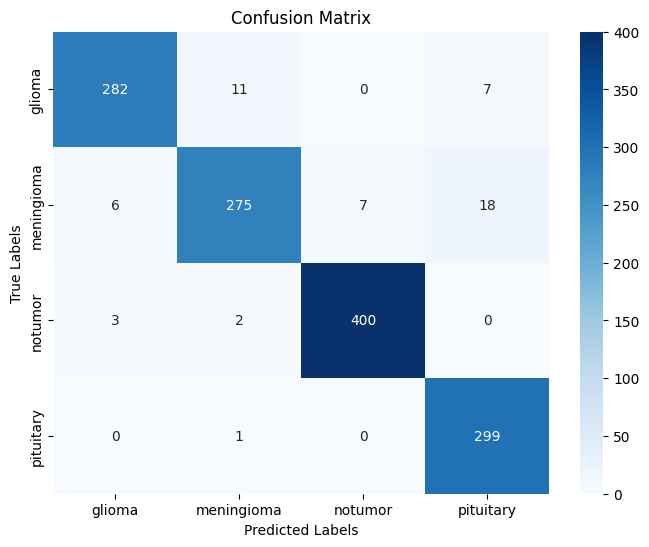

(0.14669935405254364,
 0.9580472707748413,
 '              precision    recall  f1-score   support\n\n      glioma       0.97      0.94      0.95       300\n  meningioma       0.95      0.90      0.92       306\n     notumor       0.98      0.99      0.99       405\n   pituitary       0.92      1.00      0.96       300\n\n    accuracy                           0.96      1311\n   macro avg       0.96      0.96      0.96      1311\nweighted avg       0.96      0.96      0.96      1311\n',
 array([[282,  11,   0,   7],
        [  6, 275,   7,  18],
        [  3,   2, 400,   0],
        [  0,   1,   0, 299]], dtype=int64))

In [6]:
quantized_vgg16_model = prune_model('saved/vgg16/fine_tuning/model.keras', 
                                    save_path='saved/vgg16/fine_tuning/quantized_model.keras', 
                                    pruning_percentage=0.3)

evaluate_model(quantized_vgg16_model, 
               optimized_testset,
               class_names=class_names)

Pruned model saved to saved/resnet50v2/fine_tuning/quantized_model.keras
41/41 ━━━━━━━━━━━━━━━━━━━━ 43s 937ms/step - accuracy: 0.8810 - loss: 0.3242
Test loss: 0.3242
Test accuracy: 0.8810
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 866ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 968ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 973ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 966ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 879ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 913ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 875ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 872ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 893ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 933ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 927ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 888ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 916ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 922ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 898ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 959ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 920ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step    


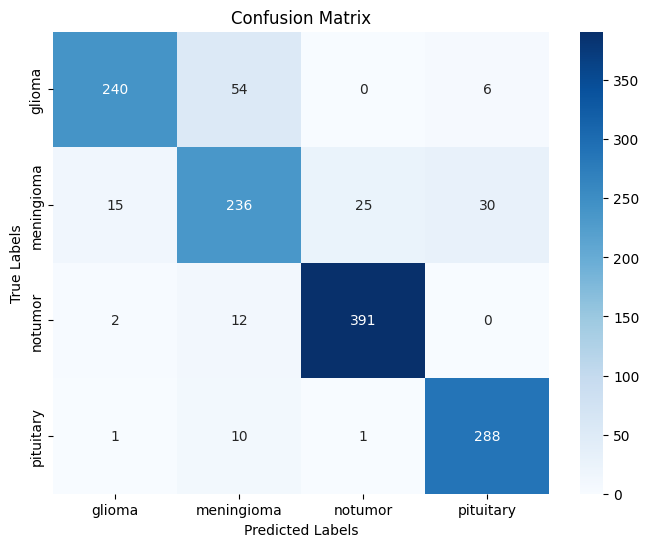

(0.3241589069366455,
 0.8810068368911743,
 '              precision    recall  f1-score   support\n\n      glioma       0.93      0.80      0.86       300\n  meningioma       0.76      0.77      0.76       306\n     notumor       0.94      0.97      0.95       405\n   pituitary       0.89      0.96      0.92       300\n\n    accuracy                           0.88      1311\n   macro avg       0.88      0.87      0.87      1311\nweighted avg       0.88      0.88      0.88      1311\n',
 array([[240,  54,   0,   6],
        [ 15, 236,  25,  30],
        [  2,  12, 391,   0],
        [  1,  10,   1, 288]], dtype=int64))

In [7]:
quantized_resnet50v2_model = prune_model('saved/resnet50v2/fine_tuning/model.keras', 
                                    save_path='saved/resnet50v2/fine_tuning/quantized_model.keras', 
                                    pruning_percentage=0.3)

evaluate_model(quantized_resnet50v2_model, 
               optimized_testset,
               class_names=class_names)